<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузим и изучим данные. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


- Пропусков нет. 
- Переведем возраст клинетов из float в int.

In [5]:
df['Возраст'] = df['Возраст'].astype('int')

Изучим все колонки датафрейма на предмет атрефактов.

In [6]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

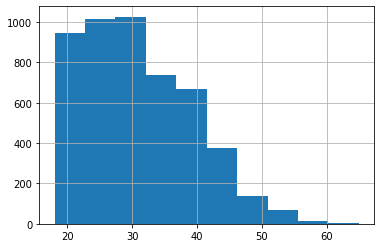

In [7]:
df['Возраст'].hist()

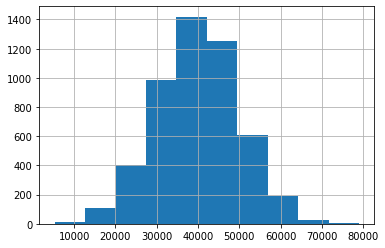

In [8]:
df['Зарплата'].hist()

In [9]:
df['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

In [10]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [11]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Вывод.  
Артефактов и выбросов нет, данные не требуеют обработки.

## Умножение матриц

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**  


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw  
$$ 

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Подставим $
w = (X^T X)^{-1} X^T y
$ в исходную формулу предсказаний $a = Xw$.  
Получим:  

$$a = X(X^T X)^{-1} X^T y$$

Подставим в формулу вычисления ветора весов линейной регрессии $w = (X^T X)^{-1} X^T y$, $XP$ вместо $X$, где $P$ обратимая матрица. Обозначим полученный вектор $w^*$. 

Формулы для преобразований:  

$(AB)^{-1} = B^{-1}A^{-1}$,  применимо для двух квадратных матриц A и B;  

$ AA^{-1} = A^{-1}A = E$, где $E$ - единичная матрица;  

$ (AB)^{T} = B^{T}A^{T}$.

В ходе преобразований получим:  

$$
w^* = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = P^{-1}(P^T X^T X)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} E X^T y = P^{-1}(X^T X)^{-1} X^T y
$$

Подставим полученный $w^*$ в формулу предсказания $a^*$, также учтем замену $X$ на $XP$ в формуле предсказаний.  

Получим:

$$
a^* =  X P w^*= X P P^{-1}(X^T X)^{-1} X^T y = X E (X^T X)^{-1} X^T y = X (X^T X)^{-1} X^T y
$$

Таким образом получили:   

$a^* =  X (X^T X)^{-1} X^T y$  

$a = X(X^T X)^{-1} X^T y$  

Следовательно:

$a^* = a$

### Вывод  
Качество линейной регрессии не изменится, так как предсказания линейной регрессии не изменятся после умножения признаков на обратимую матрицу.  
Умножение исходной матрицы с признаками на другую обратимую матрицу возможно, если ширина матрицы признаков равна высоте второй матрицы. Вторая матрица является обратимой по условию, то есть имеет обратную матрицу, следовательно она должна быть квадратной и иметь размерность (n, n), где n ширина первой матрицы.

## Алгоритм преобразования

В качестве алгорима преобразования признаков напишем класс, который будет:
- генерировать случайную матрицу функцией matrix с помощью numpy.random.normal() (с вероятностью получить необратимую матрицу близкой к нулю). Для гарантии, что случайно сгенерированная матрица будет обратимой, в дальнейшем будем успользовать матрицу обратную сгенерированной. Размерность сгенерированной матрицы равна числу признаков. 
- предусмотрим возврат предсказаний до и после преобразования признаков нашим алгоритмом функцией inspection. Для возможности сравнения результатов предсказаний. 

In [12]:
class MatrixSecure:
    def matrix(self, X, random_state=None):
        if random_state:
            np.random.seed(random_state)
        self.P = np.linalg.inv(np.random.normal(size=(X.shape[1], X.shape[1])))
        self.XP = X @ self.P
        return(self.XP)
    
    def inspection(self, X, y):
        self.a = X @ np.linalg.inv(X.T @ X) @ X.T @ y
        self.aM =  self.XP @ np.linalg.inv(self.XP.T @ self.XP) @ self.XP.T @ y
        return((self.a, self.aM))

Выделим матрицу признаков X и вектор целевого признака.

In [13]:
X = df.drop(['Страховые выплаты'], axis = 1).values
X_one = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y= df['Страховые выплаты'].values

Посмотрим на признаки после умножения на обратимую матрицу.

In [14]:
XP = MatrixSecure().matrix(X=X)
pd.DataFrame(data = XP, columns = df.drop(['Страховые выплаты'], axis = 1).columns).head()

,Пол,Возраст,Зарплата,Члены семьи
0,-49368.628249,81493.523698,14514.359180,-59698.066402
1,-37823.152384,62421.009518,11113.319567,-45732.770906
2,-20901.883708,34490.861695,6138.531627,-25271.846094
3,-41506.693602,68532.766842,12213.913346,-50196.225767
4,-25977.656303,42873.455113,7632.113839,-31410.493123


Теперь признаки преобразованы и по ним теперь проблематично узнать информацию о клиентах.  
Проверим отличается ли метрика R2 на предсказаниях полученных по формуле $a = X(X^T X)^{-1} X^T y$ на исходных признаках и преобразованных.

In [15]:
print('R2 по исходным признакам', '| R2 по исходным признакам умноженным на обратимую матрицу')
for i in range(10):
    test = MatrixSecure()
    X_P = test.matrix(X=X_one)
    a_X, a_XP = test.inspection(X=X_one, y=y)
    print(f'{r2_score(y, a_X)}         | {r2_score(y, a_XP)}')

R2 по исходным признакам | R2 по исходным признакам умноженным на обратимую матрицу
0.42494550286668         | 0.4249453863919648
0.42494550286668         | 0.42494536477473377
0.42494550286668         | 0.42494546161979085
0.42494550286668         | 0.42494549735134446
0.42494550286668         | 0.42494546645032916
0.42494550286668         | 0.42494543796849293
0.42494550286668         | 0.42494551500272226
0.42494550286668         | 0.4249455137432917
0.42494550286668         | 0.42494550277428267
0.42494550286668         | 0.42494570261867814


### Вывод 
- Написан алгоритм преобразования данных, для защиты данных клиентов. В результате преобразования по ним значительно сложнее востановить персональную информацию о клиенте; 
- по формуле $a = X(X^T X)^{-1} X^T y$ проверено значение метрики R2. Отличия после преобразования не оказывают значительного эффекта на метрику.

## Проверка алгоритма

По метрике  R2 проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. 

In [16]:
model = LinearRegression()

Обучим модель линейной регрессии и получим предсказания на исходных признаках.

In [17]:
model.fit(X, y)
predictions_X = model.predict(X)

Преобразуем признаки, обучим модель и получим предсказания на преобразованных признаках.

In [18]:
XP = MatrixSecure().matrix(X=X)
model.fit(XP, y)
predictions_XP = model.predict(XP)

Посмотрим на метрику R2.

In [19]:
print('Качество линейной регрессии на исходных признаках:', r2_score(y, predictions_X))
print('Качество линейной регрессии на преобразованных признаках:', r2_score(y, predictions_XP))

Качество линейной регрессии на исходных признаках: 0.42494550286668
Качество линейной регрессии на преобразованных признаках: 0.42494550286667065


Метрики R2 существенно не отличаются. Можно сказать что качество модели не изменилось после преобразования признаков.

Выполним обучение линейной регресии с наши алгоритмом 100 раз в цикле, чтобы удостовериться в корректности его работы. 

In [20]:
result = []
for i in range (100):
    model.fit(X, y)
    predictions_X = model.predict(X)

    XP = MatrixSecure().matrix(X=X)
    model.fit(XP, y)
    predictions_XP = model.predict(XP)
    
    R2_simular = np.isclose(r2_score(y, predictions_X), r2_score(y, predictions_XP))
    result.append(R2_simular)

Выведем процент случаев из 100 в которых качество модели линейной регрессии по метрике R2  не отличалось до и после преобразования признаков.  
Погрешности сранения равны: 
- относительная rtol=1e-05;
- абсолютная atol=1e-08. 

In [21]:
print(f'{sum(result) / 100 * 100} %')

100.0 %


###  Вывод
Алгорим преобразования признаков проверен, влияния на качество предсказаний не обнаружено. 

## Вывод
- Умножение признаков на обратимую матрицу не влияет на качество линейной регрессии. 
- После умножения на обратимую матрицу признаки оказываются преобразованы и защищены от востановления персональной информации клиентов. 
- Алгоритм защиты данных проверен на модели линейной регресии из sklearn. Можно считать что результаты линейной регресии до и после преобразования данных не отличается с относительной и абсолютной погрешностью 1e-05 и 1e-08 соответственно.  